In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
accident = pd.read_csv('data/incidents-de-securite-epsf.csv', sep = ';')
retard = pd.read_csv('data/reglarite-mensuelle-tgv-nationale.csv', sep = ';')

J'aimerais réunir les éléments par date afin d'avoir des stats pour chaque mois de 2023/2024.
Je me suis renseigné sur internet et j'ai trouvé la methode datetime qui admet des fonctionnalités utiles,
notemment extraire facilement le mois ainsi que l'année.
On rajoute ainsi dans accident la colonne mois et année

In [4]:
accident['Date'] = pd.to_datetime(accident['Date'])
accident.dtypes
accident['mois'] = pd.DatetimeIndex(accident['Date']).month
accident['année'] = pd.DatetimeIndex(accident['Date']).year


La dataframe retard contenant déjà les informations par mois, je me contente d'isoler les années et l'année 2023

In [5]:
retard['Date'] = pd.to_datetime(retard['Date'])
retard['année'] = pd.DatetimeIndex(retard['Date']).year
retard = retard[ retard['année'] == 2023]


J'isole aussi le mois afin de pouvoir comparer facilement avec la table accident

In [6]:
retard['mois'] = pd.DatetimeIndex(retard['Date']).month
retard

,Date,Régularité composite,Ponctualité origine,année,mois
96,2023-01-01,89.065483,82.388152,2023,1
97,2023-02-01,90.838404,83.006536,2023,2
98,2023-03-01,88.693164,82.092210,2023,3
99,2023-04-01,88.303113,81.286029,2023,4
100,2023-05-01,89.311594,81.597222,2023,5
101,2023-06-01,85.058853,78.502379,2023,6
102,2023-07-01,85.995537,78.254401,2023,7
103,2023-08-01,86.988811,79.864343,2023,8
104,2023-09-01,87.036582,80.486128,2023,9
105,2023-10-01,86.980411,80.946011,2023,10


In [7]:
accident

,Origine,Date,Nature,Région,Lieu,Gravité EPSF,mois,année
0,Accident de personne,2023-01-03,Accident de personne sur une traversée pour le...,Bourgogne-Franche-Comté,Meursault (21),5.0,1,2023
1,Heurt installation par tiers,2023-01-10,Incident caténaire à la suite de la collision ...,Grand Est,Revigny (55),4.0,1,2023
2,Collision hors passage à niveau,2023-01-29,nombreux dgats à la caténaire et au pantograph...,NaN,Entre salbris et la motte beuvron (41),5.0,1,2023
3,Collision passage à niveau,2023-02-02,Collision à un passage à niveau,Auvergne-Rhône-Alpes,Diou (36),5.0,2,2023
4,Réseau,2023-02-03,Lors du refoulement d’une rame voyageur vers l...,Bretagne,Lorient (56),4.0,2,2023
...,...,...,...,...,...,...,...,...
232,Accident de personne,2023-08-06,heurt par un train de voyageurs d'un passager ...,Auvergne-Rhône-Alpes,Entre venissieux et saint priest (69),5.0,8,2023
233,Réseau,2023-08-09,Heurt entre un train de travaux et un train de...,Île-de-France,Etampes (91),4.0,8,2023
234,Réseau,2023-08-28,défaut de mesure de protections et passage d'u...,Hauts-de-France,Compiegne(60),4.0,8,2023
235,Réseau,2023-08-29,Franchissement du signal C72 fermé par manœuvr...,Grand Est,Raon-L’étape (Dépt : 88),4.0,8,2023


Je cherche maintenant à sommer les gravités par mois, dans l'idée où plus l'accident est grave,
plus le retard engendré est susceptible d'avoir de l'importance
Je crée donc une table par mois ou j'ai un nombre correspondant à la somme des gravités des accidents de ce mois

In [8]:
accident.columns
data_utile = accident.loc[:, ['mois', 'Gravité EPSF']]
regroupé = data_utile.groupby(by = 'mois', axis = 0)
gravité_mois = regroupé.sum()
gravité_mois


C:\Users\Lucile\AppData\Local\Temp\ipykernel_20456\1243987391.py:3: FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
  regroupé = data_utile.groupby(by = 'mois', axis = 0)


,Gravité EPSF
mois,
1,103.0
2,147.0
3,112.0
4,77.0
5,141.0
6,146.0
7,194.0
8,126.0


In [9]:
retard_mois = retard.loc[:, ['Régularité composite', 'mois']]
retard_mois = retard_mois.set_index('mois')
retard_mois = retard_mois.loc[1:8, :]
retard_mois

,Régularité composite
mois,
1,89.065483
2,90.838404
3,88.693164
4,88.303113
5,89.311594
6,85.058853
7,85.995537
8,86.988811


In [10]:
Corrélation = retard_mois.join(gravité_mois)
Corrélation = Corrélation.set_index('Gravité EPSF')
Corrélation

,Régularité composite
Gravité EPSF,
103.0,89.065483
147.0,90.838404
112.0,88.693164
77.0,88.303113
141.0,89.311594
146.0,85.058853
194.0,85.995537
126.0,86.988811


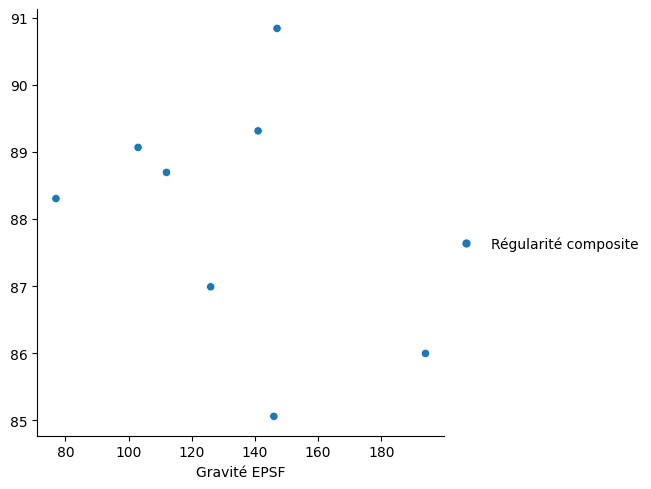

In [11]:
sns.relplot(Corrélation);

Ainsi, la corrélation ne semble pas évidente. A priori, c'est peut-être pas assez représentatif car on a eu les données sur 8 points, et qu'on a sommé par mois. Cependant, on voit tout de même que il n'y a pas de corrélation directe. Ainsi, le retard des trains n'est pas relié directement aux accidents. En réalité, un train qui a un accident arrive de temps en temps en retard mais la cause principale n'est pas due aux accidents. 

De plus, on peut regarder quels types d'incidents sont représentés dans la dataframe accident

In [13]:
accident = pd.read_csv('data/incidents-de-securite-epsf.csv', sep = ';')
accident['Nature'].value_counts()

Nature
Heurt d'un arbre par un train de voyageurs                                                                                                                                            2
Erreur de procédure pour l'exécution d'une manoeuvre à contre-voie.                                                                                                                   2
heurt d'une personne par un train de voyageurs                                                                                                                                        2
accident de personne                                                                                                                                                                  2
Incident caténaire à la suite de la collision d’une pelle mécanique contre la partie neutre d’un transversal de portique souple.                                                      1
                                                                         

On voit ainsi qu'il y a 233 types d'incidents différents, tous de manière assez disparate, allant de la percution mortelle d'un motard jusqu'à : 'Franchissement du signal C72 fermé par manœuvre de refoulement d’un convoi du GI (Le chef de manœuvre de l’Infralog a omis de demander à l’AC la commande à l’ouverture du signal)'
On répertorie donc ainsi tous les types d'incidents, mais on ne connait pas la cause de ceux-ci.